# Data 201 Project 1
## By
Yujie Deng, Michael P. Vasquez, Daniel P. Lefevre, Richmond K. Yeboah

## Introduction

On 15 April 1912, RMC Titanic struck an iceberg in the middle of a voyage from Southhampton to New York City. One thousand five hundred and three passengers passed away. The dataset acquired through Kaggle contains information on the passengers who were aboard the Titanic. We will be analyzing variables and their effect on the survival rate of the passengers.

Import Pakages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

## Dataset

The dataset was published on Kaggle in 2018 by Pavlo Fesenko. The dataset combines the Titanic dataset published by Kaggle for their machine learning competition and Titanic passenger information published in Wikipedia. The dataset consists of 1309 rows of passengers who were aboard the Titanic the day it sank. Twenty-one variables are provided to develop a machine learning model to determine if a passenger would survive the incident. 

Load dataset

In [ ]:
titanic_data = pd.read_csv('titanic.csv', index_col = 0)
titanic_data.shape # The shape() function returns the shape of an array

(1309, 20)

In [ ]:
titanic_data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WikiId,Name_wiki,Age_wiki,Hometown,Boarded,Destination,Lifeboat,Body,Class
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,691.0,"Braund, Mr. Owen Harris",22.0,"Bridgerule, Devon, England",Southampton,"Qu'Appelle Valley, Saskatchewan, Canada",NaN,NaN,3.0
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,90.0,"Cumings, Mrs. Florence Briggs (née Thayer)",35.0,"New York, New York, US",Cherbourg,"New York, New York, US",4,NaN,1.0
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,865.0,"Heikkinen, Miss Laina",26.0,"Jyväskylä, Finland",Southampton,New York City,14?,NaN,3.0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,127.0,"Futrelle, Mrs. Lily May (née Peel)",35.0,"Scituate, Massachusetts, US",Southampton,"Scituate, Massachusetts, US",D,NaN,1.0
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,627.0,"Allen, Mr. William Henry",35.0,"Birmingham, West Midlands, England",Southampton,New York City,NaN,NaN,3.0


## Description of Variables

Listed below are the twenty-one variables provided to determine if a passenger would have survive the incident.

- PassengerId: The order of the listed passenger in the dataset
- Survived: Indicates if the passenger survived the incident:
  - Survived = 1
  - Passed away = 0
- Pclass: The class of the passenger's ticket which can be 1, 2, or 3
- Name: Name of the passenger
- Sex: Sex of the passenger
- Age: Age of the passanger
- SibSp: Number of siblings or spouses aboard the Titanic
- Parch: Number of parents or children aboard the Titanic
- Ticket: Passenger ticket number
- Fare: The cost of the ticket
- Cabin: Passenger cabin number
- Embarked: Port of embarkation:
  - C = Cherbourg
  - Q = Queenstown
  - S = Southampton
- WikiId: The order of the listed passenger in the Wikipedia page
- Name_wiki: Name of passenger as written in Wikipedia
- Age_wiki: Age of passenger as written in Wikipedia
- Hometown: Hometown of passenger as written in Wikipedia
- Boarded: Port of embarkation as written in Wikipedia
- Destination: Passenger destination as written in Wikipedia
- Lifeboat: Lifeboat from which passengers were known to be rescued
- Body: Victims whose remains were recovered after the sinking are listed with a superscript next to the body number, indicating the recovery vessel:
  - MB – CS Mackay-Bennett (bodies 1–306)
  - M – CS Minia (bodies 307–323)
  - MM – CGS Montmagny (bodies 326–329)
  - A – SS Algerine (body 330)
  - O – RMS Oceanic (bodies 331–333)
  - I – SS Ilford (body 334)
  - OT – SS Ottawa [64] (body 335)
- Class: The class of the passenger's ticket as written in Wikipedia

# Descriptive Anaylsis of Dataset

### Passenger Survival by Class

On the night of the incident of the Titanic sinking, the dataset displays that the ship had 1,309 passengers. The passengers were separated into three classes. The First-class consisted 277 of passengers who were prominent members of the upper class. Second-class passengers consisted of 323 people who were leisure tourists, academics, members of the clergy, and middle-class English, Scottish and American families. Third-class passengers consisted of 709 who were individuals from different nationalities and ethnic groups immigrating to North America to start a new life. The number of passengers per class from the Titanic dataset and Wikipedia differs slightly.

A calculation on the percentage of known passengers who survived demonstrated that about 38 percent of the passengers survived the incident. First-class passengers had the highest percentage of survivors, but the difference in the percentages between the classes is small. The percentage of individuals that were saved per class demonstrates a bias towards members of  First-class.

In [ ]:
#Separate the dataset by class
class_1 = titanic_data[titanic_data["Pclass"]==1]
class_2 = titanic_data[titanic_data["Pclass"]==2]
class_3 = titanic_data[titanic_data["Pclass"]==3]

#Print the percentage of passengers who survived by class
print(f'Percentage of Total Survivors that were from Class 1: {round(sum(class_1["Survived"]==1)/len(titanic_data[titanic_data["Survived"].notnull()])*100)}%')
print(f'Percentage of Total Survivors that were from Class 2: {round(sum(class_2["Survived"]==1)/len(titanic_data[titanic_data["Survived"].notnull()])*100)}%')
print(f'Percentage of Total Survivors that were from Class 3: {round(sum(class_3["Survived"]==1)/len(titanic_data[titanic_data["Survived"].notnull()])*100)}%')
print("\n")
#Print the percentage of passengers who survived by class
print(f'Percentage of Survivors of Class 1: {round(sum(class_1["Survived"]==1)/len(class_1[class_1["Survived"].notnull()])*100)}%')
print(f'Percentage of Survivors of Class 2: {round(sum(class_2["Survived"]==1)/len(class_2[class_2["Survived"].notnull()])*100)}%')
print(f'Percentage of Survivors of Class 3: {round(sum(class_3["Survived"]==1)/len(class_3[class_3["Survived"].notnull()])*100)}%')


Percentage of Total Survivors that were from Class 1: 15%
Percentage of Total Survivors that were from Class 2: 10%
Percentage of Total Survivors that were from Class 3: 13%


Percentage of Survivors of Class 1: 63%
Percentage of Survivors of Class 2: 47%
Percentage of Survivors of Class 3: 24%


The boxplots display the distribution of ages of passengers faceted by class who survived or passed away. The median ages of all survivors are below the median age of those who passed away. The graphs display an inclination towards younger passengers surviving, regardless of class. The median age of survivors decreases by class with First-class being the highest and followed by Second-class and Third-class, respectively.


/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


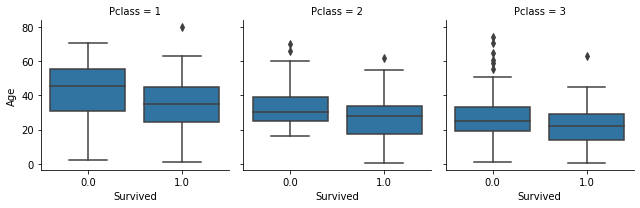

In [ ]:
#Create a faceted gird by class to demonstrate the age distribution of survivors
g = sns.FacetGrid(titanic_data, col="Pclass")
g.map(sns.boxplot, "Survived", "Age")

### Passenger Age Distribution

The first plot is a age distribution plot with a kernel density estimate and histogram. The normalized distribution is also integrated into the plot. We can see passenger’s age have a right skew. Majority of the passengers are from age 20-40. 

The second plot shows the percentage of survivors vs. non-survivors in each group. The survival rate is around 40% for most groups. Senior passengers in age group 60-80 have lower survival rate of 20%. The overall survival rate decreases as age increases. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Passenger Age Distribution')]

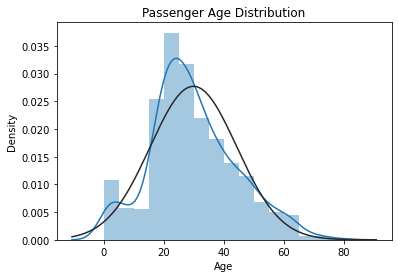

In [ ]:
from scipy.stats import norm
p = sns.distplot(titanic_data['Age'], fit=norm, bins=16)
p.set(title='Passenger Age Distribution')

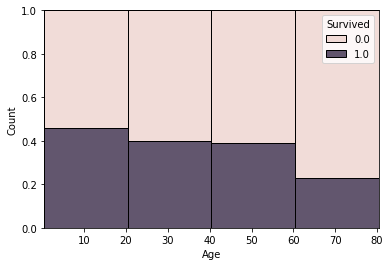

In [ ]:
sns.histplot(titanic_data, x='Age', hue='Survived', binwidth=20, multiple='fill')

The median age of passengers aboard the Titanic on the day of the incident was 28 years old. The median age of passengers was determined by creating 10,000 bootstraps of 10 percent of the passenger's ages. 

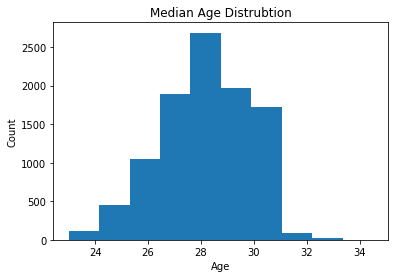

In [ ]:
#Remomve ages without a value
titanic_data_ages = titanic_data[titanic_data["Age"].notnull()]

#conduct bootstrap to infer the median age of passengers
#create random seed to reproduce the same results 
np.random.seed(1234)

#empty list to save results from sample
median_boot_samples = []

#Conduct bootstrap of 10% of the data 10,000 
n= round(len(titanic_data_ages["Age"]) * 0.1)
for i in range(10000):
                boot_sample = resample(titanic_data_ages["Age"], n_samples = n )
                median_boot_samples.append(np.median(boot_sample))

#Plot distribution of results 
plt.hist(median_boot_samples)
plt.title("Median Age Distrubtion")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

### Embarkation of Survivors

Let's take a look at where most surviors boarded and a few other variables.

[Text(0.5, 1.0, 'Titanic Male vs Female Survivors')]

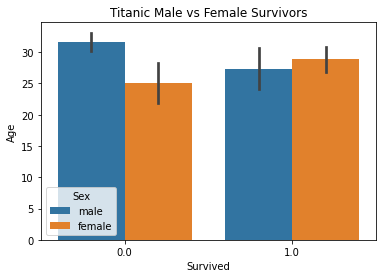

In [ ]:
 sns.barplot( x = 'Survived', y = 'Age', hue = 'Sex', data = titanic_data ).set(title = 'Titanic Male vs Female Survivors') 

In [ ]:
titanic_analyst = (titanic_data.loc[:,['Age', 'Boarded', 'Fare', 'Sex', 'Survived' ]])
print(titanic_analyst)

              Age      Boarded      Fare     Sex  Survived
PassengerId                                               
1            22.0  Southampton    7.2500    male       0.0
2            38.0    Cherbourg   71.2833  female       1.0
3            26.0  Southampton    7.9250  female       1.0
4            35.0  Southampton   53.1000  female       1.0
5            35.0  Southampton    8.0500    male       0.0
...           ...          ...       ...     ...       ...
1305          NaN  Southampton    8.0500    male       NaN
1306         39.0    Cherbourg  108.9000  female       NaN
1307         38.5  Southampton    7.2500    male       NaN
1308          NaN  Southampton    8.0500    male       NaN
1309          NaN    Cherbourg   22.3583    male       NaN

[1309 rows x 5 columns]


In [ ]:
surviors_southhampton = titanic_analyst[titanic_analyst['Boarded']=='Southampton']
surviors_cherbourg = titanic_analyst[titanic_analyst['Boarded']=='Cherbourg']
print(surviors_southhampton) 
print(surviors_cherbourg)

              Age      Boarded     Fare     Sex  Survived
PassengerId                                              
1            22.0  Southampton   7.2500    male       0.0
3            26.0  Southampton   7.9250  female       1.0
4            35.0  Southampton  53.1000  female       1.0
5            35.0  Southampton   8.0500    male       0.0
7            54.0  Southampton  51.8625    male       0.0
...           ...          ...      ...     ...       ...
1303         37.0  Southampton  90.0000  female       NaN
1304         28.0  Southampton   7.7750  female       NaN
1305          NaN  Southampton   8.0500    male       NaN
1307         38.5  Southampton   7.2500    male       NaN
1308          NaN  Southampton   8.0500    male       NaN

[916 rows x 5 columns]
              Age    Boarded      Fare     Sex  Survived
PassengerId                                             
2            38.0  Cherbourg   71.2833  female       1.0
10           14.0  Cherbourg   30.0708  female     

Notice that more people boarded at Southhampton then Cherbourg (we know this by looking at the amount of rows)

(0.0, 300.0)

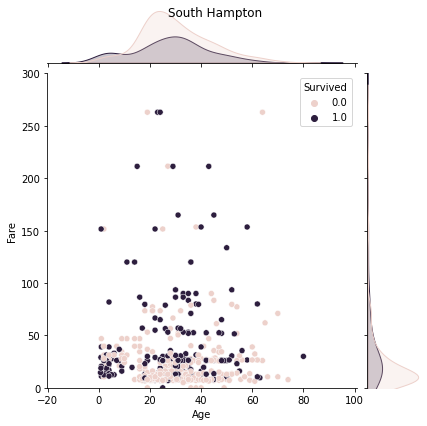

In [ ]:
SH_jointplot = sns.jointplot(x='Age', y='Fare', hue ='Survived' , data=surviors_southhampton,kind='scatter')
SH_jointplot.fig.suptitle("South Hampton")
plt.ylim(0, 300)

(0.0, 600.0)

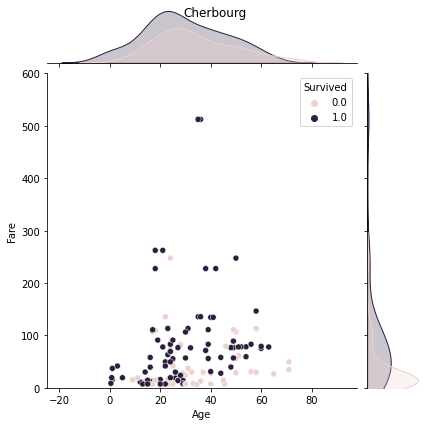

In [ ]:
CB_jointplot = sns.jointplot(x='Age', y='Fare', hue ='Survived' , data=surviors_cherbourg,kind='scatter')
CB_jointplot.fig.suptitle("Cherbourg")
plt.ylim(0, 600)

Overall there were more passangers boarding at South Hampton Which resulted in more survivors from South Hampton. Most of the passangers boarding in both South Hampton and Cherboug ranged from 20 to 40.

# Passenger Survival based on Title/Status

First we will extract the passenger titles from the "Name_Wiki" column. This will work for most cases, and the few passengers whose names follow a distinct format can be handled separately

In [ ]:
titanic_data['prefix_firstname'] = titanic_data['Name_wiki'].str.split(", ").str[1]
titanic_data['prefix'] = titanic_data['prefix_firstname'].str.split(" ").str[0]

Some manual data cleaning for passengers with odd names:

In [ ]:
titanic_data.loc[404, 'prefix'] = "Mr."
titanic_data.loc[1021, 'prefix'] = "Miss"
titanic_data.loc[557, 'prefix'] = "Lady"
titanic_data.loc[760, 'prefix'] = "Lady"
# Make "Father" and "Reverend" into one title
titanic_data.loc[150, 'prefix'] = "Father/Rev."
titanic_data.loc[250, 'prefix'] = "Father/Rev."
titanic_data.loc[887, 'prefix'] = "Father/Rev."
titanic_data.loc[1056, 'prefix'] = "Father/Rev."
titanic_data.loc[151, 'prefix'] = "Father/Rev."
titanic_data.loc[627, 'prefix'] = "Father/Rev."
titanic_data.loc[1041, 'prefix'] = "Father/Rev."
# These passengers have a title starting with the word "The"
titanic_data.loc[823, 'prefix'] = "Hnr."
titanic_data.loc[849, 'prefix'] = "Father/Rev."
titanic_data_clean = titanic_data.drop(index=1306, axis=0, inplace=False)

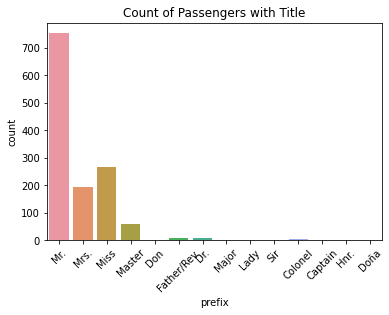

In [ ]:
ax = sns.countplot(x='prefix', data=titanic_data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("Count of Passengers with Title")
plt.show()

In the above plot, we can see a raw breakdown of the number of passengers having each title on the ship. In order to visualise each column in more detail, we will plot this again on a log scale, and group each title by passenger survival:

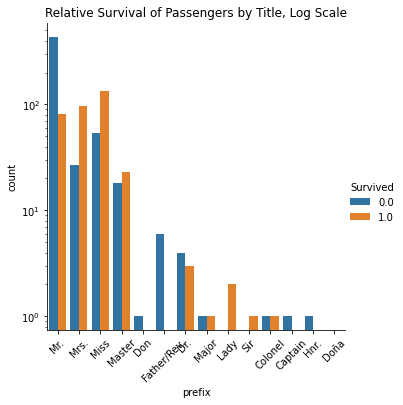

In [ ]:
ax1 = sns.catplot(x = 'prefix', kind = "count", hue = "Survived", data = titanic_data)
ax1.ax.set_yscale('log')
ax1.ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
plt.title("Relative Survival of Passengers by Title, Log Scale")
plt.show()

Here we can see that male passengers were, overall, more likely to perish than survive, while the opposite is true of both married and unmarried women. Males with the title of "Master" were more likely to survive, while all female passengers with titles of nobility survived as well. When we also consider that younger passsengers were overall more likely to survive, this could be evidence that survival rate was biased towards wealthier passengers.

## Conclusion

A majority of passengers aboard the Titanic embarked from Southhampton. The analysis demonstrated that the age of the passengers and ticket class influenced their survival. The first-class had the highest survival rate out of the three. The age distribution of passengers showed the median age of passengers who survived was below those who passed away.  The majority of the passengers were between the ages of 20 and 40 years old. A passenger's age and survival rate are inversely correlated because survival rate decreases as age increases. Younger passengers have a higher survivor rate than elderly passengers. Passengers with the title of nobility displayed a higher likelihood of survival, reinforcing a bias of survival of wealthier passengers. Being an affluent younger passenger is a good indicator for surviving the sinking of the Titanic. 

## Citation

- Wikimedia Foundation. (2021, October 30). Passengers of the Titanic. Wikipedia. Retrieved November 1, 2021, from https://en.wikipedia.org/wiki/Passengers_of_the_Titanic. 

- Fesenko, P. (2019, March 6). Titanic extended dataset (Kaggle + Wikipedia). Kaggle. Retrieved November 1, 2021, from https://www.kaggle.com/pavlofesenko/titanic-extended. 